<a href="https://colab.research.google.com/github/1man1/2020-11-study/blob/main/Unit09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unit 8에서 인구 데이터를 꺾은선 그래프와 막대그래프, 수평 막대그래프로 시각했습니다. 학창 시절 교과서에서만 보던 그래프가 아니라, 정부에서 제공하는 최신 데이터를 활용해서 우리 동네 또는 내가 궁금한 동네의 인구 구조를 한눈에 알아볼 수 있게 된 것을 축하합니다!

In [ ]:
%matplotlib inline  
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
!apt-get update -qq
!apt-get install fonts-nanum* -qq
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False#마이너스 기호 나오게

NanumGothic Eco


In [ ]:
plt.rc('font', family=font_name)
plt.rc('font', family=font_name)

그림 9-1의 그래프는 Unit 8에서 마지막으로 나타낸 그래프입니다. 그렇다면 이 그래프만 보고 “우리 동네의 남성과 여성 중 어떤 성별의 비율이 높을까?”라는 질문에 쉽게 답할 수 있을까요? 이 항아리 모양의 그래프로는 알기 어려운 정보입니다.

또, 제주도를 여성, 돌, 바람이 많다 하여 ‘삼다도(三多島)’라고 불렀는데, 실제로 제주도의 남녀 비율을 비교하면 정말 여성이 더 많을까요? 이번 장에서는 이런 질문들을 해결할 방법을 알아보겠습니다.

찾고 싶은 지역의 이름을 알려주세요 : 신도림


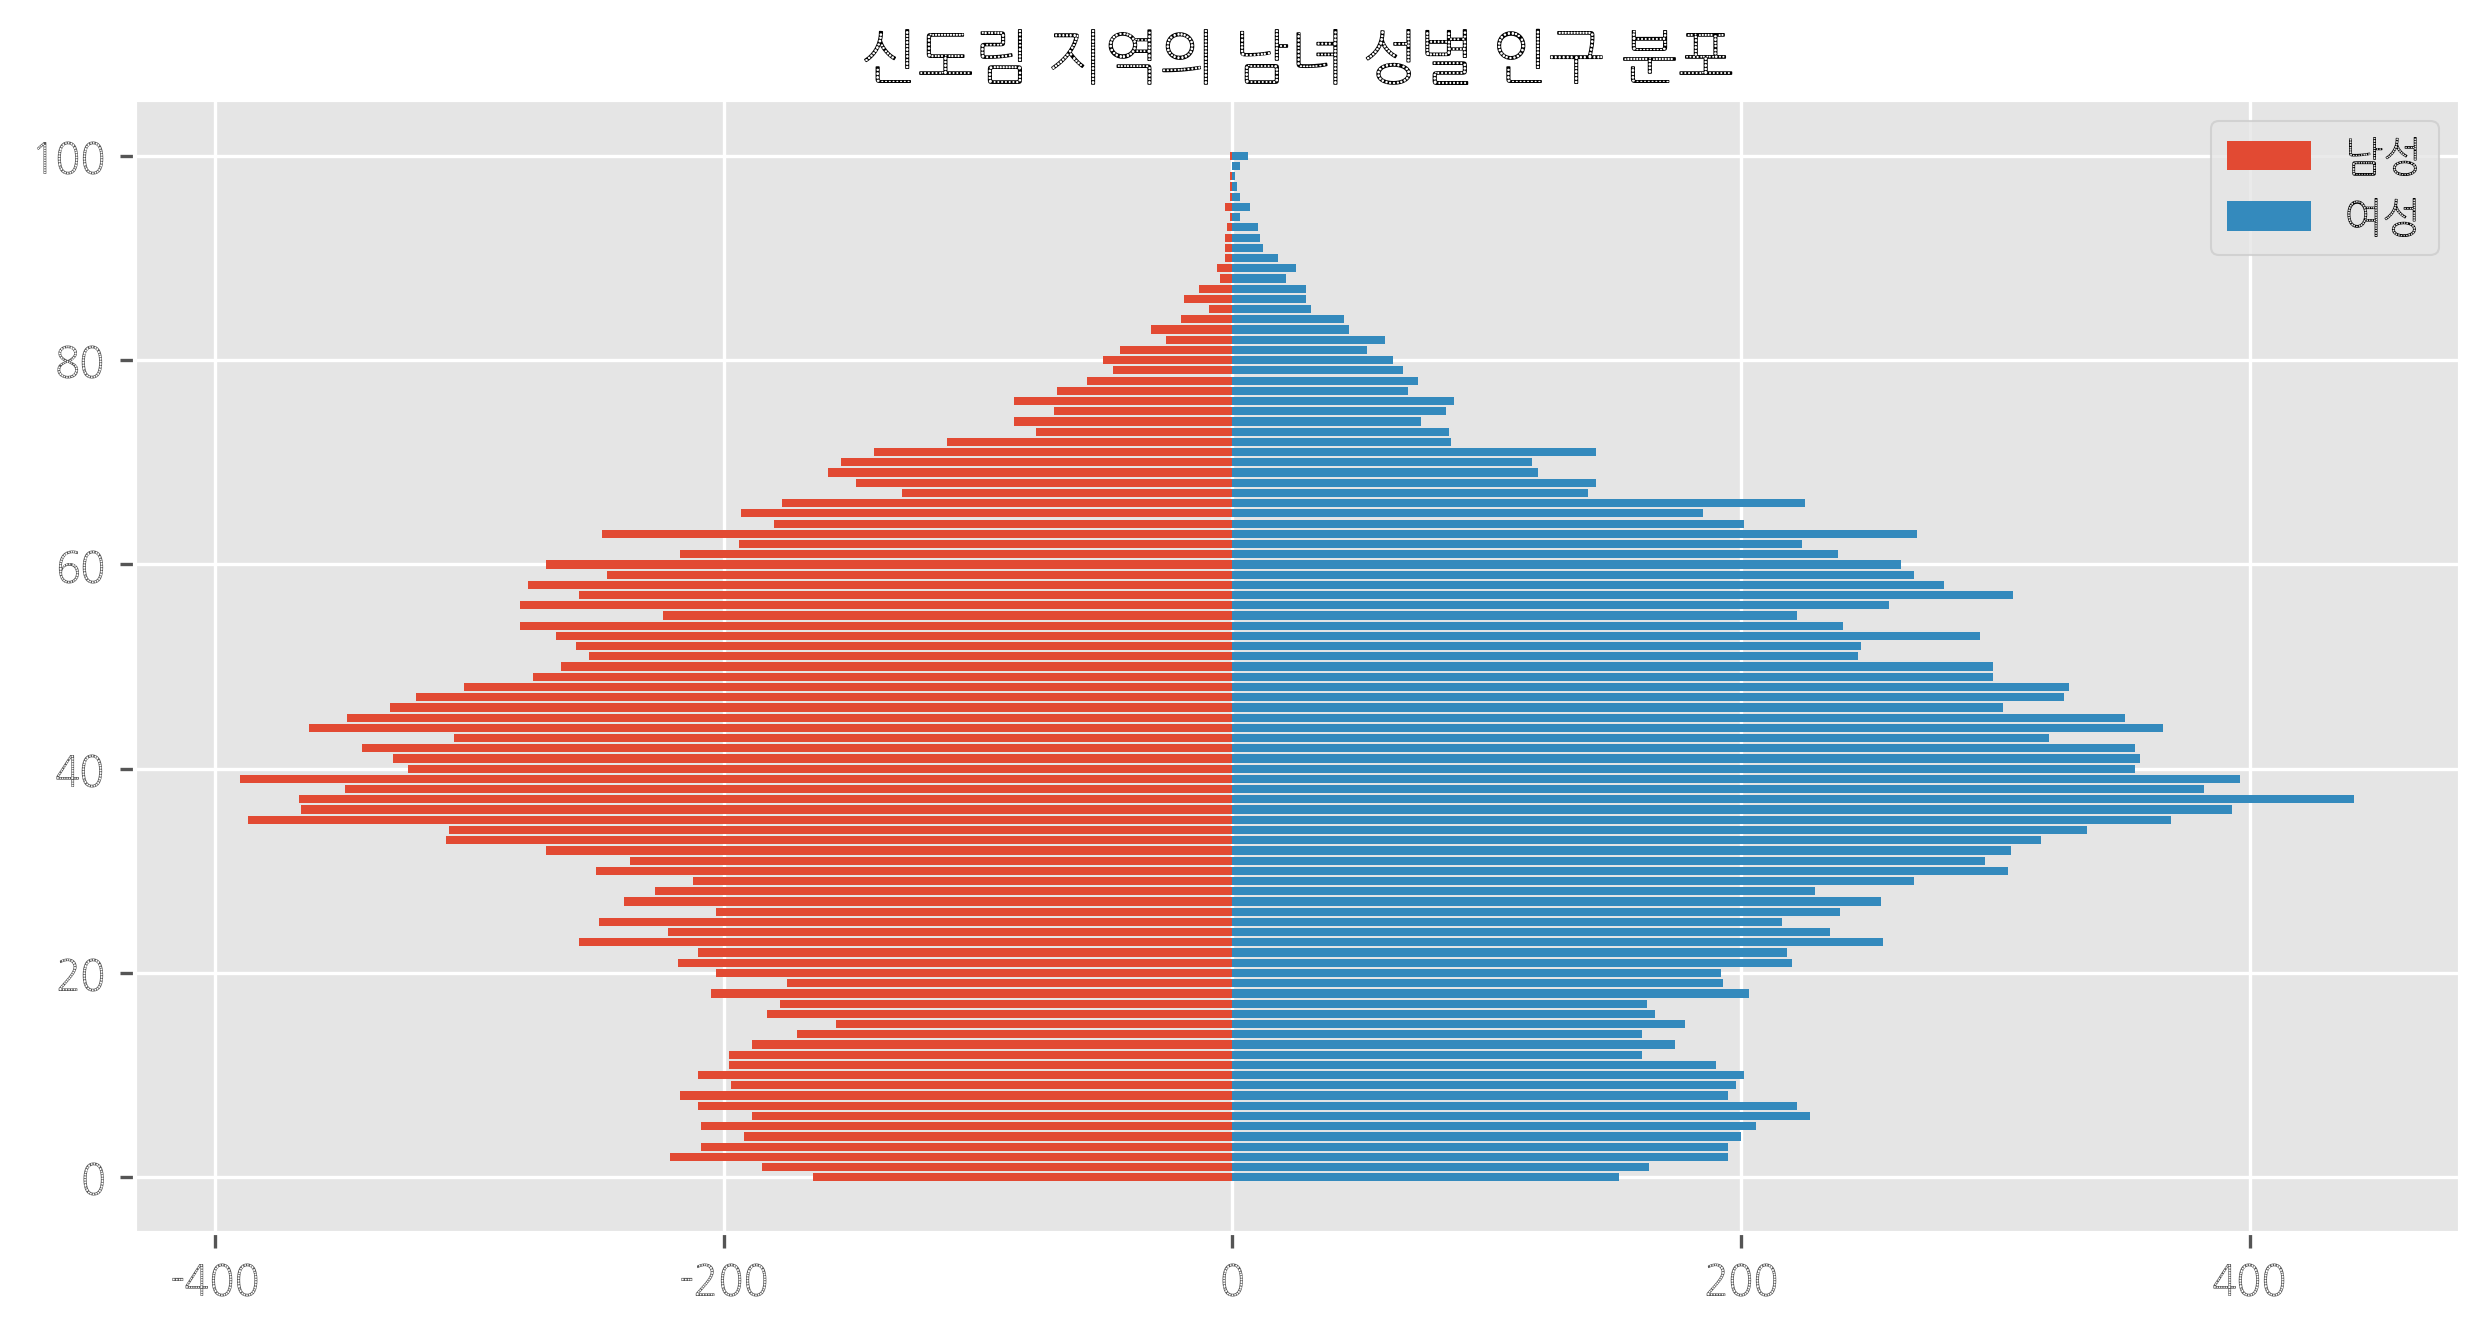

In [ ]:
import csv
f = open('gender.csv',encoding='cp949')
data = csv.reader(f)


m = []
f = []



name = input('찾고 싶은 지역의 이름을 알려주세요 : ')
for row in data :
    if name in row[0] :
        for i in row[3:104] :
            m.append(-int(i))
        for i in row[106:] :
            f.append(int(i))
        break



import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
plt.title(name+' 지역의 남녀 성별 인구 분포')
plt.barh(range(101), m, label='남성')
plt.barh(range(101), f, label='여성')
plt.legend()
plt.show()

1 제주도에는 여성의 비율이 더 높을까

break 키워드를 추가한 코드를 실행했더니 제주특별자치도 전체의 항아리 모양 그래프가 성공적으로 그려졌습니다.

TIP

데이터를 살펴보면 같은 이름을 가진 다른 지역들이 종종 있습니다. 예를 들면 ‘부흥동’이라는 지역은 경기도 안양시 동안구 부흥동(4117354000)과 전라남도 목포시 부흥동(4611080000) 두 곳이 있습니다. 그런데 우리가 지금껏 작성한 코드에서는 그 둘을 구분할 수 없습니다. 어떻게 코드를 작성하면 이 문제를 해결할 수 있을까요? 이는 여러분의 몫으로 남겨두겠습니다.

우리가 처음에 던진 질문을 기억하나요? ‘제주도에는 어떤 성별이 더 많이 살고 있는가?’였습니다. 하지만 그림 9-3과 같은 항아리 모양의 그래프에서는 연령대별 인구 차이는 확인할 수 있지만, 어떤 성별이 더 많은지에 대한 정보는 한눈에 파악하기가 다소 어렵습니다. 그렇다면 어떤 형태의 그래프로 표현하였을 때 전체적인 비율을 쉽게 파악할 수 있을까요?

여러분이 떠올린 그래프가 적절한지 이어지는 내용을 통해 확인하겠습니다.

2 혈액형 비율 표현하기

여러분의 혈액형은 무엇인가요? 주변 사람들의 혈액형을 물어본 적이 있나요? 혈액형마다 특징이 다르다는 이야기를 한번쯤 들어봤을 겁니다. 그러한 이야기들이 다 맞아떨어지는 것은 아니지만 어느 정도 공감을 얻는 부분이 있기에 주변 사람들의 혈액형을 궁금해하는 듯합니다.

예를 들어, CEO를 대상으로 잡코리아에서 조사한 결과에 따르면 A형은 CEO, 경영, 사무 관련 직무, B형은 생산, 현장 관련 직무, O형은 영업, 관리 관련 직무, AB형은 마케팅, 광고 홍보 관련 직무의 비율이 가장 높았다고 합니다.


그림 9-5 내 주변 사람들의 혈액형은 무엇일까요?

 

여러 결과를 보며 누군가는 이런 궁금증을 가질 것입니다.

 

‘내 주변의 사람들은 어떤 혈액형이 가장 많을까?’

 

이러한 궁금증을 해결하고자 조사한 각 혈액형의 비율을 pie() 함수로 표현하겠습니다. 만약 여러분도 같은 궁금증이 생겼다면 나름대로 조사한 결과를 pie() 함수로 표현해 보세요. 물론 임의의 수치를 넣어도 괜찮습니다. 혈액형은 A, B, O, AB로 구분해 봅시다.

■ pie( ) 함수

‘원그래프’라고도 불리는 파이 차트(pie chart)는 평소 뉴스나 신문에서 많이 봤던 형태입니다. pie() 함수는 전체 데이터 중 특정 데이터의 비율을 보기 쉽게 표현합니다. 예를 들어, 100명을 대상으로 혈액형을 조사했다면 100명 중 A형이 몇 명인지 그 비율을 쉽게 파악할 수 있습니다.

다음은 pie() 함수를 사용한 예로, pyplot 라이브러리를 불러온 후 pie() 함수의 괄호 안에 값을 입력하여 파이 차트를 그리는 코드입니다.

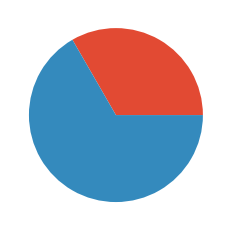

In [ ]:
import matplotlib.pyplot as plt
plt.pie([10, 20])
plt.show()

TIP

실행 환경에 따라 그래프의 색깔은 다를 수 있습니다. pie( ) 함수에 입력한 데이터의 크기에 따라 원의 비율이 결정됩니다. pie( ) 함수 안에 있는 숫자를 바꿔서 실행하면 더 잘 이해될 것입니다.

■ 동그란 원 그리기

파이 차트를 조금 더 동그란 원으로 표현하겠습니다. axis() 함수를 추가하여 동그란 원을 그릴 수 있습니다. 여기에서는 혈액형 비율을 임의로 작성하여 파이 차트로 표현하겠습니다.

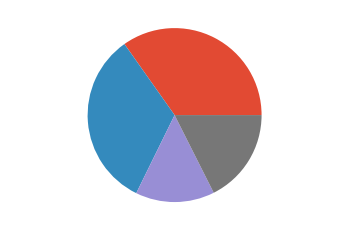

In [ ]:
import matplotlib.pyplot as plt
size = [2441, 2312, 1031, 1233]
plt.axis('equal')
plt.pie(size)
plt.show()

size라는 리스트에 저장된 값을 모두 합친 값을 기준으로, 각 값이 차지하는 비율이 동그란 파이 차트로 표현되었습니다. 하지만 어떤 색이 A형이며, 정확히 몇 퍼센트(%)인지 표시해야 더욱 유용할 것 같네요. 하나씩 해결해 봅시다.

■ 레이블 추가하기

우리는 물건을 살 때 가격표나 성분이 적힌 종이인 레이블을 보곤 합니다. 그래프를 읽을 때도 어느 부분이 무엇을 나타내는지 적어 둔 것을 읽습니다. 이러한 정보를 적어 놓은 것을 ‘레이블(lable)’이라 부릅니다. 그래프에 레이블을 추가하여 각 그래프가 어떤 항목을 의미하는지 표현할 수 있습니다.

본격적으로 파이 차트에 각 항목의 이름을 표현해 볼까요? 앞에서 보았던 코드에 명령어를 추가해 봅시다. size 리스트에 저장된 데이터의 개수가 4개이므로, label이라는 리스트에 4개의 항목을 저장합니다. 이후 pie() 함수의 labels 속성에 값을 넣어 각 항목의 의미를 쉽게 알아볼 수 있게 합니다.

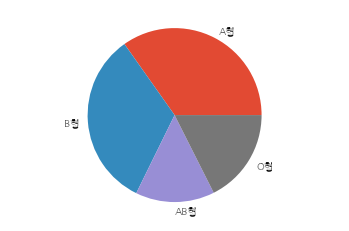

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')    # 그래프에 한글 표시
size = [2441, 2312, 1031, 1233]           # 데이터
label = ['A형','B형','AB형', 'O형']       # 레이블
plt.axis('equal')
plt.rc('font', family=font_name)
plt.pie(size, labels=label)
plt.show()

■ 비율 및 범례 표시하기

레이블을 추가하니 각 그래프가 어떤 항목을 의미하는지 쉽게 파악할 수 있습니다. 하지만 그림 9-8 그래프에서 A형과 B형처럼 비율이 비슷한 항목의 경우, 어떤 혈액형의 비율이 더 높은지 구분하기가 어렵습니다. pie() 함수의 autopct 속성을 사용하여 각 항목의 비율을 표시해 볼까요?

autopct 속성은 auto percent를 의미하며, 어떤 형태로 값을 표시할지 작성하면 각 항목의 비율을 자동으로 계산해서 표시합니다. 정확한 계산을 위해 소수점까지 나타내는 float(실수) 형태로 표시해 봅시다.

소수점 아래 둘째 자리에서 반올림한 값을 표시하고자 autopct 속성의 값을 %.1f%%로 지정합니다. 소수점 아래 첫 번째 소수점까지 표현하겠다는 의미입니다. 그리고 legend() 함수를 사용해 범례도 간단히 추가합니다.

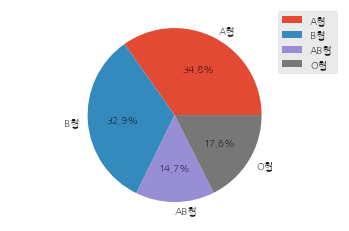

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
size = [2441, 2312, 1031, 1233]
label = ['A형','B형','AB형', 'O형']
plt.axis('equal')
plt.rc('font', family=font_name)
plt.pie(size, labels=label, autopct='%.1f%%')
plt.legend()
plt.show()

■ 색 및 돌출 효과 정하기

이제 조금만 더 손을 보면 그럴듯한 파이 차트를 만들 수 있을 것 같습니다. 차트의 색을 조금 더 예쁘게 바꾸고, 특정 혈액형이 돌출되도록 하겠습니다.

우선 색은 colors 속성으로 설정할 수 있습니다. colors 속성에 다양한 값을 쉽게 설정할 수 있게 color 리스트를 사용해 볼까요? 항목 순서대로 설정하고 싶은 색의 이름을 저장하여 표현할 수 있습니다.

또한, 특정 혈액형의 비율이 돌출하는 효과는 explode 속성으로 설정할 수 있습니다. 돌출되는 정도는 데이터 순서에 따라 설정할 수 있습니다. 0은 돌출되지 않음을 의미합니다. 여기서는 가장 적은 비율을 차지하는 AB형을 강조하겠습니다. A형, B형, AB형, O형 순서로 값이 저장되어 있으므로 0, 0, 0.1, 0으로 설정합니다.

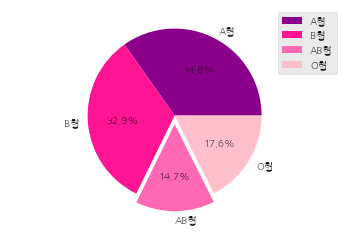

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
size = [2441, 2312, 1031, 1233]
label = ['A형','B형','AB형', 'O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.axis('equal')
plt.rc('font', family=font_name)
plt.pie(size, labels=label, autopct='%.1f%%', colors=color, explode=(0,0,0.1,0))
plt.legend()
plt.show()

matplotlib 라이브러리에서 사용할 수 있는 다양한 색의 이름

matplotlib 라이브러리에서는 다음과 같이 다양한 색의 이름을 사용할 수 있습니다.


 

• URL https://matplotlib.org/gallery/color/named_colors.html

이렇게 이름을 사용하는 것 외에도 RGB 코드를 활용해서 표현할 수도 있지만 이 책에서는 다루지 않습니다. 더 자세한 내용은 matplotlib.org에서 확인하세요.

제주도의 성별 인구 비율 표현하기

파이 차트를 다루는 여러 속성들을 살펴보았으니, 다시 돌아가서 제주도의 성별 인구 비율을 표현해 봅시다. 항아리 모양의 그래프에서는 연령대별 성별 데이터를 구했지만, 이번에는 성별 합계 데이터를 구해야 합니다. 인구 데이터를 다시 볼까요?

 

남성 연령별 인구수

여성 연령별 인구수

열 이름

지역명

총인구1

총인구2

0세

1세

(생략)

99세

100세

이상

총인구1

총인구2

0세

1세

(생략)

99세

100세

이상

인덱스 번호

0

1

2

3

4

...

102

103

104

105

106

107

...

115

116

표 9-1 남성 데이터에 이어서 여성 데이터가 나옴

 

이전에 만들었던 항아리 모양의 그래프는 연령별 인구를 표현해야 했기에 row 리스트에서 남성 연령별 인구 데이터는 m 리스트에 저장하고, 여성 연령별 인구 데이터는 f 리스트에 저장했습니다.

그에 반해, 성별 합계 데이터를 구하려면 남성 인구 총합과 여성 인구 총합을 저장할 변수 2개가 필요합니다. 남성 인구는 row 리스트의 3~103번까지, 여성 인구는 row 리스트의 106~116번까지의 데이터를 더하여 구할 수 있습니다.

range() 함수를 사용하면 row 리스트의 인덱스를 좀더 쉽게 다룰 수 있습니다. 남성과 여성의 합계를 각각 구한 후에는 size 리스트에 성별 인구 합계를 추가하여 결과를 출력하도록 코드를 수정하였습니다.

In [ ]:
import csv


f = open('gender.csv',encoding='cp949')
data = csv.reader(f)
size = []
name = input('찾고 싶은 지역의 이름을 알려주세요 : ')
for row in data :
    if name in row[0] :
        m = 0
        f = 0
        for i in range(101) :
            m += int(row[i+3])    # 3 ~ 103번까지 데이터 더하기
            f += int(row[i+106])  # 106 ~ 206번까지 데이터 더하기
        break
size.append(m)                    # 남성 합계 데이터 리스트에 추가
size.append(f)                    # 여성 합계 데이터 리스트에 추가
print(size)

찾고 싶은 지역의 이름을 알려주세요 : 안양
[285185, 290365]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_

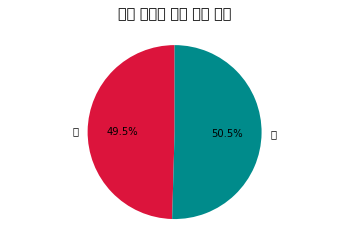

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
color = ['crimson', 'darkcyan']
plt.axis('equal')
plt.pie(size, labels=['남', '여'], autopct='%.1f%%', colors=color, startangle=90)
plt.title(name+' 지역의 남녀 성별 비율')
plt.show()

TIP

실행 결과 그래프는 생략하겠습니다. 그림 9-11에서 확인할 수 있습니다.

파이 차트의 시작 각도를 지정하는 startangle 속성

startangle 속성은 파이 차트의 시작 각도를 정해줍니다. startangle 속성 값을 90으로 설정하면 반시계방향으로 90도 이동하여, 12시 정각 위치에서 그래프가 시작됩니다.

원하는 지역의 성별 인구를 파이 차트로 그리기

찾고 싶은 지역의 이름을 알려주세요 : 안양


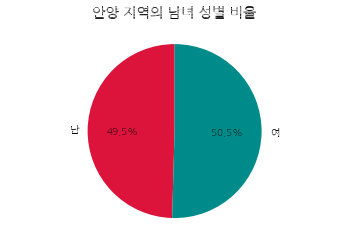

In [ ]:
import csv
 
f = open('gender.csv',encoding='cp949')
data = csv.reader(f)             # 데이터 불러오기

size = []                        # 남녀 인구수를 저장할 빈 리스트 만들기

name = input('찾고 싶은 지역의 이름을 알려주세요 : ') # 지역 이름 입력받기
for row in data :
    if name in row[0] :          # name과 일치하는 지역 찾기
        m = 0                    # 남성 인구수를 누적해서 더할 변수 초기화하기
        f = 0                    # 여성 인구수를 누적해서 더할 변수 초기화하기
        for i in range(101) :
            m += int(row[i+3])   # 남성 인구수를 누적해서 더하기
            f += int(row[i+106]) # 여성 인구수를 누적해서 더하기
        break                    # 반복 종료
size.append(m)                   # 남성 인구수를 size 리스트에 더하기
size.append(f)                   # 여성 인구수를 size 리스트에 더하기

import matplotlib.pyplot as plt
plt.rc('font', family=font_name)
color = ['crimson', 'darkcyan']  # 색상 설정하기
plt.axis('equal')
 
plt.pie(size, labels=['남', '여'], autopct='%.1f%%', colors=color, startangle=90)
plt.title(name+' 지역의 남녀 성별 비율')  # 제목 설정하기
plt.show()